In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip

--2020-12-16 12:51:06--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.36.52
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.36.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100929731 (96M) [application/zip]
Saving to: ‘8a95c26e1bab11eb.zip’

8a95c26e1bab11eb.zi 100%[===================>]  96.25M  14.0MB/s    in 8.4s    

2020-12-16 12:51:15 (11.4 MB/s) - ‘8a95c26e1bab11eb.zip’ saved [100929731/100929731]



In [ ]:
!unzip 8a95c26e1bab11eb.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/b70a166bfe.jpg  
  inflating: dataset/train/d31875b68e.jpg  
  inflating: dataset/train/22c66793fb.jpg  
  inflating: dataset/train/a468b1390f.jpg  
  inflating: dataset/train/9e43d2cedc.jpg  
  inflating: dataset/train/2e0299e991.jpg  
  inflating: dataset/train/e0b85d8ff1.jpg  
  inflating: dataset/train/6a651ec04a.jpg  
  inflating: dataset/train/46c87716a5.jpg  
  inflating: dataset/train/8c40d4f073.jpg  
  inflating: dataset/train/96e4fb744c.jpg  
  inflating: dataset/train/794a698960.jpg  
  inflating: dataset/train/dad1934f35.jpg  
  inflating: dataset/train/a1c66a2b3c.jpg  
  inflating: dataset/train/b62484a8e4.jpg  
  inflating: dataset/train/09462814f1.jpg  
  inflating: dataset/train/97dbdb4dd0.jpg  
  inflating: dataset/train/3bd7f56164.jpg  
  inflating: dataset/train/a2576a2fa1.jpg  
  inflating: dataset/train/f462f66aa6.jpg  
  inflating: dataset/train/740e1a7fca.jpg  
  inflating: dataset/trai

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train=pd.read_csv('dataset/train.csv')
test=pd.read_csv('dataset/test.csv')
train.head(6)

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix
5,d04b95dd67,thamnophis-sirtalis


In [ ]:
j=[]
for i in train['image_id']:
  xx=str(i)+str('.jpg')
  j.append(xx)
train['image_id']=j
j=[]
for i in test['image_id']:
  xx=str(i)+str('.jpg')
  j.append(xx)
test['image_id']=j
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [ ]:
train['breed'].nunique()

35

In [ ]:
path= '/content/dataset/'
k= '/content/train.csv'
p ='/content/test.csv'

In [ ]:
path= '/content/dataset/train/'
tfms = get_transforms(flip_vert=True,max_zoom=1.5,max_warp=0,do_flip=True,xtra_tfms=[cutout()])
data = (ImageList.from_csv(path, csv_name = '../../train.csv')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=224)
        .databunch(num_workers=0,bs=32))

In [ ]:
val=data.classes
print(val)

['agkistrodon-contortrix', 'agkistrodon-piscivorus', 'coluber-constrictor', 'crotalus-atrox', 'crotalus-horridus', 'crotalus-ruber', 'crotalus-scutulatus', 'crotalus-viridis', 'diadophis-punctatus', 'haldea-striatula', 'heterodon-platirhinos', 'lampropeltis-californiae', 'lampropeltis-triangulum', 'masticophis-flagellum', 'natrix-natrix', 'nerodia-erythrogaster', 'nerodia-fasciata', 'nerodia-rhombifer', 'nerodia-sipedon', 'opheodrys-aestivus', 'pantherophis-alleghaniensis', 'pantherophis-emoryi', 'pantherophis-guttatus', 'pantherophis-obsoletus', 'pantherophis-spiloides', 'pantherophis-vulpinus', 'pituophis-catenifer', 'rhinocheilus-lecontei', 'storeria-dekayi', 'storeria-occipitomaculata', 'thamnophis-elegans', 'thamnophis-marcianus', 'thamnophis-proximus', 'thamnophis-radix', 'thamnophis-sirtalis']


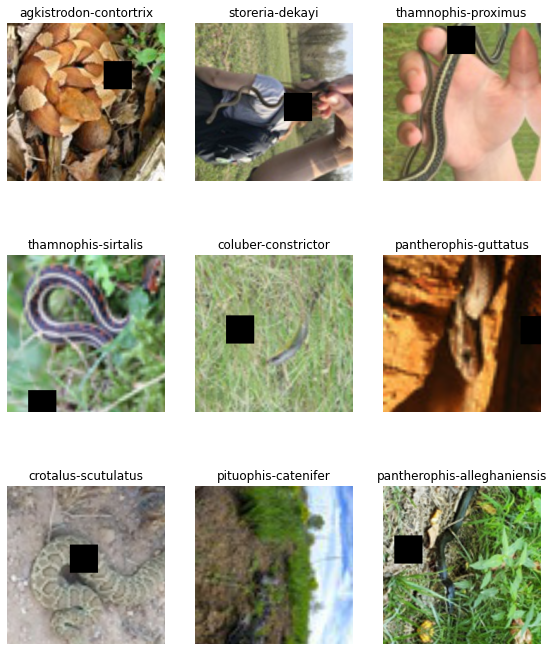

In [ ]:
## to see the images in train with there labels
data.show_batch(rows=3, figsize=(8,10))

In [ ]:
## print the target classes
print(data.classes)

['agkistrodon-contortrix', 'agkistrodon-piscivorus', 'coluber-constrictor', 'crotalus-atrox', 'crotalus-horridus', 'crotalus-ruber', 'crotalus-scutulatus', 'crotalus-viridis', 'diadophis-punctatus', 'haldea-striatula', 'heterodon-platirhinos', 'lampropeltis-californiae', 'lampropeltis-triangulum', 'masticophis-flagellum', 'natrix-natrix', 'nerodia-erythrogaster', 'nerodia-fasciata', 'nerodia-rhombifer', 'nerodia-sipedon', 'opheodrys-aestivus', 'pantherophis-alleghaniensis', 'pantherophis-emoryi', 'pantherophis-guttatus', 'pantherophis-obsoletus', 'pantherophis-spiloides', 'pantherophis-vulpinus', 'pituophis-catenifer', 'rhinocheilus-lecontei', 'storeria-dekayi', 'storeria-occipitomaculata', 'thamnophis-elegans', 'thamnophis-marcianus', 'thamnophis-proximus', 'thamnophis-radix', 'thamnophis-sirtalis']


In [ ]:
learn = cnn_learner(data, models.densenet169, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


In [ ]:
from fastai import *
from fastai.vision import *
from sklearn.model_selection import StratifiedKFold
from pathlib import Path
import shutil
from sklearn.metrics import f1_score, confusion_matrix

np.random.seed(1786)
ROOT = "/tmp/data011121"

In [ ]:

def read_data(root):
    train_df = pd.read_csv(k)
    test_df = pd.read_csv(p)
    return train_df, test_df

In [ ]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc = metrics[0], metrics[1]
        if (self.best_acc is None) or (acc > self.best_acc) or (loss < self.best_loss):
            self.best_acc = acc
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Save the best acc {:.5f}".format(self.best_acc))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Acc is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

In [ ]:
#Path(ROOT).mkdir(exist_ok=True, parents=True)
src1 = "/content/dataset"
shutil.copytree(src1, ROOT)


if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(16, random_state=2**31-1).split(train_df, train_df.breed))
    
    tfms1 = get_transforms(max_zoom=1.8)
    test_preds_all = []
    val_preds_all = []
    for i in range(1):
        print("Starting fold {}".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT, folder="train").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=272, bs=16, resize_method=3).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="test"))
        learn = cnn_learner(data, models.resnet152, metrics=accuracy, ps=0.5)
        # learn.model[0].load_state_dict(torch.load("../input/save-body-weights-marvel/bestmodel_body.path"))
        cb = SaveBestModel(learn, name="bestmodel_{}".format(i))
        # learn.fit(1, callbacks=cb)
        learn.fit_one_cycle(4)
        learn.unfreeze()
        #learn.fit_one_cycle(5, max_lr=1e-4, callbacks=[cb])
        #learn.fit_one_cycle(4, max_lr=5e-5, callbacks=[cb])
        learn.fit_one_cycle(3, max_lr=1e-5, callbacks=[cb])
        #learn.fit_one_cycle(4, max_lr=5e-6, callbacks=[cb])
        learn.fit_one_cycle(2, max_lr=1e-6, callbacks=[cb])
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
        shutil.copy(src, fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)

    np.save("test_preds.npy", test_preds_all)
    np.save("val_preds.npy", val_preds_all)

(5508, 2) (2361, 1)
Starting fold 0
(5163,) (345,)


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.487041,2.745629,0.310145,02:19
1,2.811476,2.203914,0.382609,02:20
2,2.350983,1.945458,0.449275,02:20
3,2.103872,1.879234,0.446377,02:20


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,1.918130,1.842547,0.449275,03:20
1,1.837047,1.777924,0.472464,03:20
2,1.730557,1.772411,0.463768,03:20


Save the best acc 0.44928
Save the best acc 0.47246
Save the best acc 0.46377


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,1.749194,1.754608,0.475362,03:20
1,1.700007,1.741900,0.478261,03:20


Save the best acc 0.47536
Save the best acc 0.47826


F1 score for this fold  0.46432448399241727


In [ ]:

x = np.argmax(test_preds_all, axis=1)
y=val
xx=[]
for i in x:
  xx.append(y[i])
xx

['pantherophis-alleghaniensis',
 'agkistrodon-piscivorus',
 'pantherophis-obsoletus',
 'storeria-dekayi',
 'pantherophis-obsoletus',
 'lampropeltis-triangulum',
 'pantherophis-obsoletus',
 'pantherophis-obsoletus',
 'pantherophis-obsoletus',
 'agkistrodon-piscivorus',
 'pantherophis-alleghaniensis',
 'pituophis-catenifer',
 'crotalus-atrox',
 'pantherophis-obsoletus',
 'lampropeltis-triangulum',
 'crotalus-ruber',
 'rhinocheilus-lecontei',
 'crotalus-atrox',
 'heterodon-platirhinos',
 'agkistrodon-piscivorus',
 'crotalus-viridis',
 'heterodon-platirhinos',
 'heterodon-platirhinos',
 'diadophis-punctatus',
 'agkistrodon-contortrix',
 'pituophis-catenifer',
 'pantherophis-obsoletus',
 'pantherophis-obsoletus',
 'thamnophis-marcianus',
 'lampropeltis-californiae',
 'pantherophis-vulpinus',
 'agkistrodon-contortrix',
 'thamnophis-sirtalis',
 'agkistrodon-piscivorus',
 'thamnophis-sirtalis',
 'pantherophis-obsoletus',
 'lampropeltis-triangulum',
 'thamnophis-sirtalis',
 'pituophis-catenifer

In [ ]:
submission = pd.DataFrame({
        "image_id":test['image_id'],
        "breed":xx
    })
submission.to_csv('./dryl.csv', index=False)
print(submission)

        image_id                        breed
0     7ede553357  pantherophis-alleghaniensis
1     3500b219e4       agkistrodon-piscivorus
2     d43a78d6d9       pantherophis-obsoletus
3     1f36f26994              storeria-dekayi
4     8cb85fc58e       pantherophis-obsoletus
...          ...                          ...
2356  93e591cb23  pantherophis-alleghaniensis
2357  68a603b39d       pantherophis-obsoletus
2358  4f472510f3        rhinocheilus-lecontei
2359  d6884444ae        heterodon-platirhinos
2360  c0fa7df5de  pantherophis-alleghaniensis

[2361 rows x 2 columns]
